# Proyecto Final, Parte 1: Exploración de Datos

## 1. Importación de librerías

A continuación se importarán las librerías que se usarán para realizar la exploración de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# Opción para mostrar todas las columnas.
pd.set_option('display.max_columns', None)

# Semilla de random_state
rs = 12345

# Tamaño del conjunto de pruebas.
ts = 0.2

## 2. Importación de datos

A continuación se importarán cada una de las tablas en dataframes y se mostrarán sus primeros registros para verificar que la información se haya obtenido exitosamente.

In [2]:
df_internet = pd.read_csv("internet.csv")
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [3]:
df_contract = pd.read_csv("contract.csv")
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_personal = pd.read_csv("personal.csv")
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_phone = pd.read_csv("phone.csv")
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## 3. Descripción de los datos

En el siguiente apartado se realizará un análisis de cada tabla y de cada una de sus columnas para verificar sus tipos de datos, presencia de valores faltantes y otras características que sean de relevancia para el análisis.

### 3.1 Internet

In [6]:
# Breve descripción de las columnas.
# No se encuentran valores faltantes.
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [7]:
# Breve descripción de las frecuencias de las columnas.
# La mayoría de las columnas son binarias, por lo que no presentarán mayor problema al realizar un modelo.
df_internet.describe(include="all")

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


### 3.2 Contract

In [8]:
# Breve descripción de las columnas.
# No se encuentran valores faltantes.
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
# Breve descripción de la distribución de los datos.
# Llama la atención la columna TotalCharges, la cual debería ser de tipo numérico.
df_contract.describe(include="all")

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [10]:
# Verificamos la columna TotalCharges
# Vemos que el problema es que se encuentran valores faltantes en la columna TotalCharges.
# Sin embargo, estos valores no se muestran cono NaN, sino como un caracter de espacio vacío.
df_contract["totalchargesnum"] = pd.to_numeric(df_contract["TotalCharges"], errors="coerce")
df_contract[df_contract["totalchargesnum"].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,totalchargesnum
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,NaN


In [11]:
# Verificamos los valores de la columna Type, así como su distribución.
df_contract["Type"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [12]:
# ¿Por qué hay contratos a uno y dos años sin fecha de fin del contrato?
df_contract[["Type","EndDate"]].value_counts()

Type            EndDate            
Month-to-month  No                     2220
Two year        No                     1647
One year        No                     1307
Month-to-month  2019-11-01 00:00:00     429
                2019-12-01 00:00:00     419
                2020-01-01 00:00:00     413
                2019-10-01 00:00:00     394
One year        2019-10-01 00:00:00      56
                2019-11-01 00:00:00      39
                2020-01-01 00:00:00      37
                2019-12-01 00:00:00      34
Two year        2019-11-01 00:00:00      17
                2019-12-01 00:00:00      13
                2020-01-01 00:00:00      10
                2019-10-01 00:00:00       8
dtype: int64

In [13]:
# Verificamos los valores de la columna PaymentMethod, así como su distribución.
df_contract["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
# Verificamos la distribución de los valores de la columna BeginDate.
df_contract["BeginDate"].value_counts().sort_index()

2013-10-01      3
2013-11-01      2
2013-12-01      3
2014-01-01      7
2014-02-01    366
             ... 
2019-10-01    237
2019-11-01    237
2019-12-01    220
2020-01-01    233
2020-02-01     11
Name: BeginDate, Length: 77, dtype: int64

In [15]:
# Verificamos los valores de la columna EndDate, así como su distribución.
# Vemos que la mayoría de contratos son de duración indefinida.
df_contract["EndDate"].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

### 3.3 Personal

In [16]:
# Breve descripción de las columnas.
# No se encuentran valores faltantes.
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [17]:
# Breve descripción de la distribución de los datos.
df_personal.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [18]:
# Verificamos los valores de la columna SeniorCitizen.
# Concluimos que la mayoría de las columnas de esta tabla son binarias, por lo que no presentarán mayor problema al entrenar un modelo.
df_personal["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### 3.4 Phone

In [19]:
# Breve descripción de las columnas.
# No se encuentran valores faltantes.
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [20]:
# Verificamos la distribución de los datos.
# Vemos que solo poseen un identificador y una columna binaria.
df_phone.describe(include="all")

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


## 4. Unión de las tablas

In [21]:
df_internet["customerID"] = df_internet["customerID"].astype(str)
df_contract["customerID"] = df_contract["customerID"].astype(str)
df_personal["customerID"] = df_personal["customerID"].astype(str)
df_phone["customerID"] = df_phone["customerID"].astype(str)

In [22]:
df_full = pd.merge(df_internet,df_contract,on="customerID",how="outer")
df_full = pd.merge(df_full,df_personal,on="customerID",how="outer")
df_full = pd.merge(df_full,df_phone,on="customerID",how="outer")
df_full.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,totalchargesnum,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,Female,0,Yes,No,NaN
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1889.50,Male,0,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,108.15,Male,0,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1840.75,Male,0,No,No,NaN
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,151.65,Female,0,No,No,No


In [23]:
# Existen varias filas con valores faltantes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   InternetService   5517 non-null   object 
 2   OnlineSecurity    5517 non-null   object 
 3   OnlineBackup      5517 non-null   object 
 4   DeviceProtection  5517 non-null   object 
 5   TechSupport       5517 non-null   object 
 6   StreamingTV       5517 non-null   object 
 7   StreamingMovies   5517 non-null   object 
 8   BeginDate         7043 non-null   object 
 9   EndDate           7043 non-null   object 
 10  Type              7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  totalchargesnum   7032 non-null   float64
 16  gender            7043 non-null   object 


In [24]:
df_null = df_full[df_full.isnull().any(axis=1)]
df_null.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,totalchargesnum,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,Female,0,Yes,No,NaN
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1840.75,Male,0,No,No,NaN
7,6713-OKOMC,DSL,Yes,No,No,No,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,301.90,Female,0,No,No,NaN
18,8779-QRDMV,DSL,No,No,Yes,No,No,Yes,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65,39.65,Male,1,No,No,NaN
23,8665-UTDHZ,DSL,No,Yes,No,No,No,No,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.2,30.20,Male,0,Yes,Yes,NaN


In [25]:
# Existen 2211 clientes que no están en las tablas de internet o phone.
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2211 non-null   object 
 1   InternetService   685 non-null    object 
 2   OnlineSecurity    685 non-null    object 
 3   OnlineBackup      685 non-null    object 
 4   DeviceProtection  685 non-null    object 
 5   TechSupport       685 non-null    object 
 6   StreamingTV       685 non-null    object 
 7   StreamingMovies   685 non-null    object 
 8   BeginDate         2211 non-null   object 
 9   EndDate           2211 non-null   object 
 10  Type              2211 non-null   object 
 11  PaperlessBilling  2211 non-null   object 
 12  PaymentMethod     2211 non-null   object 
 13  MonthlyCharges    2211 non-null   float64
 14  TotalCharges      2211 non-null   object 
 15  totalchargesnum   2200 non-null   float64
 16  gender            2211 non-null   object 


## 5. Preguntas

1. ¿Cómo deberíamos tratar a los clientes que están faltantes en las tablas de Internet y Phone?
2. ¿Existe más información personal cuantitativa de los clientes? La mayoría de la información en las tablas es categórica, por lo que limita bastante la elección de modelos.
3. En el caso de EndDate, que es la variable objetivo, ¿un "No" significa que la cuenta fue cancelada o también existe la posibilidad de que existan contratos de duración indefinida? 
4. También existe un gran desequilibrio de clases en la columna EndDate, ¿deberíamos pedir más información o darle algún tratamiento?
5. En el caso de los clientes que tienen vacía la columna de TotalCharges, ¿se debe a que son cuentas nuevas al momento de que se tomó la data y no han tenido cargos o existe alguna otra razón?
6. ¿Cómo se calcula la columna TotalCharges? Ya que se ve que sus valores no cuadran con una simple multiplicación entre MonthlyCharges y la cantidad de meses que lleva el contrato, ¿existen otros cargos que no se encuentran en las tablas? y de ser así, ¿es posible obtener esta información?

## 6. Plan de Trabajo

1. Implementar los cambios que surjan de la reunión y reunificar las tablas.
2. Codificar las variables categóricas para mejorar su manejo por los modelos.
3. Elegir y entrenar modelos (se recomienda alguna implementación de árbol que pueda manejar bien datos categóricos).
4. En caso no se alcance la métrica objetivo, realizar alguna técnica de manejo de desbalance de clases como Oversampling y volver a entrenar.
5. Documentar y entregar resultados.

# Parte 2: Modelaje

A continuación se realizará el tratamiento de variables y la creación del modelo de clasificación para determinar si un cliente dejará de tener relación con la empresa. Esto se indica con el valor de la columna EndDate igual a "No".

Se utilizará un modelo de clasificación de árbol con potenciación de gradiente de la librería LightGBM, ya que este posee una implementación para variables categóricas, de las cuales hay en abundancia en la base de datos de entrenamiento.

## 7. Tratamiento de variables

A continuación se realizará la transformación y creación de variables previo a alimentar al modelo.

In [26]:
# Convertimos los nombres de las variables a minúsculas para mayor comodidad.
df_full.columns = map(str.lower,df_full.columns)
df_full.columns

Index(['customerid', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'totalchargesnum', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'multiplelines'],
      dtype='object')

In [27]:
# Creación de nuestra variable objetivo.
df_full["ended"] = (df_full["enddate"] == "No") * 1
df_full.head()

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalchargesnum,gender,seniorcitizen,partner,dependents,multiplelines,ended
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,Female,0,Yes,No,NaN,1
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1889.50,Male,0,No,No,No,1
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,108.15,Male,0,No,No,No,0
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1840.75,Male,0,No,No,NaN,1
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,151.65,Female,0,No,No,No,0


In [28]:
# Listamos las variables categóricas de la tabla previo a codificarlas.
categorical = ["internetservice"
               ,"onlinesecurity"
               ,"onlinebackup"
               ,"deviceprotection"
               ,"techsupport"
               ,"streamingtv"
               ,"streamingmovies"
               ,"type"
               ,"paperlessbilling"
               ,"paymentmethod"
               ,"gender"
               ,"seniorcitizen"
               ,"partner"
               ,"dependents"
               ,"multiplelines"]

In [29]:
# Realizamos una codificación de las variables categóricas, ya que LightGBM necesita que estén en formato numérico para procesarlas.
df_enc = pd.DataFrame.copy(df_full)
encoder = OrdinalEncoder()
encoder.fit(df_enc[categorical])
df_enc[categorical] = encoder.transform(df_enc[categorical])
df_enc.head()

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalchargesnum,gender,seniorcitizen,partner,dependents,multiplelines,ended
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,No,0.0,1.0,2.0,29.85,29.85,29.85,0.0,0.0,1.0,0.0,NaN,1
1,5575-GNVDE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-04-01,No,1.0,0.0,3.0,56.95,1889.5,1889.50,1.0,0.0,0.0,0.0,0.0,1
2,3668-QPYBK,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019-10-01,2019-12-01 00:00:00,0.0,1.0,3.0,53.85,108.15,108.15,1.0,0.0,0.0,0.0,0.0,0
3,7795-CFOCW,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2016-05-01,No,1.0,0.0,0.0,42.30,1840.75,1840.75,1.0,0.0,0.0,0.0,NaN,1
4,9237-HQITU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,2019-11-01 00:00:00,0.0,1.0,2.0,70.70,151.65,151.65,0.0,0.0,0.0,0.0,0.0,0


In [30]:
# Mostramos los tipos de dato de las variables, para verificar que la codificación haya tenido éxito.
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   internetservice   5517 non-null   float64
 2   onlinesecurity    5517 non-null   float64
 3   onlinebackup      5517 non-null   float64
 4   deviceprotection  5517 non-null   float64
 5   techsupport       5517 non-null   float64
 6   streamingtv       5517 non-null   float64
 7   streamingmovies   5517 non-null   float64
 8   begindate         7043 non-null   object 
 9   enddate           7043 non-null   object 
 10  type              7043 non-null   float64
 11  paperlessbilling  7043 non-null   float64
 12  paymentmethod     7043 non-null   float64
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  totalchargesnum   7032 non-null   float64
 16  gender            7043 non-null   float64


In [31]:
# Quitamos los 11 registros que nacieron en febrero de 2020, ya que generan ruido en la base por no poseer un valor de TotalCharges.
df_enc.drop(df_enc.query("begindate == '2020-02-01'").index,inplace=True)

In [32]:
# Convertimos la variable BeginDate a tipo datetime.
df_enc["begindate"] = pd.to_datetime(df_enc["begindate"])

In [33]:
# Dejamos como vacíos los registros iguales a "No" y convertimos la variable EndDate a tipo datetime.
df_enc["enddate"].replace("No",None,inplace=True)
df_enc["enddate"] = pd.to_datetime(df_enc["enddate"])
df_enc[df_enc["enddate"].isna()]

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalchargesnum,gender,seniorcitizen,partner,dependents,multiplelines,ended
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,NaT,0.0,1.0,2.0,29.85,29.85,29.85,0.0,0.0,1.0,0.0,NaN,1
1,5575-GNVDE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-04-01,NaT,1.0,0.0,3.0,56.95,1889.5,1889.50,1.0,0.0,0.0,0.0,0.0,1
3,7795-CFOCW,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2016-05-01,NaT,1.0,0.0,0.0,42.30,1840.75,1840.75,1.0,0.0,0.0,0.0,NaN,1
6,1452-KIOVK,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2018-04-01,NaT,0.0,1.0,1.0,89.10,1949.4,1949.40,1.0,0.0,0.0,1.0,1.0,1
7,6713-OKOMC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2019-04-01,NaT,0.0,0.0,3.0,29.75,301.9,301.90,0.0,0.0,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4807-IZYOZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01,NaT,2.0,0.0,0.0,20.65,1020.75,1020.75,0.0,0.0,0.0,0.0,0.0,1
7039,9710-NJERN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01,NaT,2.0,0.0,3.0,20.15,826,826.00,0.0,0.0,0.0,0.0,0.0,1
7040,9837-FWLCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-01,NaT,0.0,1.0,2.0,19.20,239,239.00,1.0,0.0,1.0,1.0,0.0,1
7041,0871-OPBXW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-01,NaT,0.0,1.0,3.0,20.05,39.25,39.25,0.0,0.0,0.0,0.0,0.0,1


In [34]:
# Imputamos la variable "MultipleLines" con el valor de 0 (es binaria).
df_enc["multiplelines"].fillna(0,inplace=True)

In [35]:
#En los siguientes pasos se realizará una imputación de la variable EndDate.
# A continuación se calculará la cantidad de meses que el cliente habría recibido servicios basados en los cargos realizados.
# Se calculan los cargos como una división entre TotalCharges y MonthlyCharges.
df_enc["months"] = (df_enc["totalchargesnum"] / df_enc["monthlycharges"]).astype(int)
df_enc.head()

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalchargesnum,gender,seniorcitizen,partner,dependents,multiplelines,ended,months
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,NaT,0.0,1.0,2.0,29.85,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1,1
1,5575-GNVDE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-04-01,NaT,1.0,0.0,3.0,56.95,1889.5,1889.50,1.0,0.0,0.0,0.0,0.0,1,33
2,3668-QPYBK,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019-10-01,2019-12-01,0.0,1.0,3.0,53.85,108.15,108.15,1.0,0.0,0.0,0.0,0.0,0,2
3,7795-CFOCW,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2016-05-01,NaT,1.0,0.0,0.0,42.30,1840.75,1840.75,1.0,0.0,0.0,0.0,0.0,1,43
4,9237-HQITU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,2019-11-01,0.0,1.0,2.0,70.70,151.65,151.65,0.0,0.0,0.0,0.0,0.0,0,2


In [36]:
# Se crea una nueva variable en la que se calcula la fecha final que se tendría al calcular los meses con el método ya explicado.
df_enc["enddate2"] = ((df_enc["begindate"].dt.to_period("M")) + df_enc["months"]).dt.to_timestamp()
df_enc.head()

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalchargesnum,gender,seniorcitizen,partner,dependents,multiplelines,ended,months,enddate2
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-01-01,NaT,0.0,1.0,2.0,29.85,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1,1,2020-02-01
1,5575-GNVDE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-04-01,NaT,1.0,0.0,3.0,56.95,1889.5,1889.50,1.0,0.0,0.0,0.0,0.0,1,33,2020-01-01
2,3668-QPYBK,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019-10-01,2019-12-01,0.0,1.0,3.0,53.85,108.15,108.15,1.0,0.0,0.0,0.0,0.0,0,2,2019-12-01
3,7795-CFOCW,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2016-05-01,NaT,1.0,0.0,0.0,42.30,1840.75,1840.75,1.0,0.0,0.0,0.0,0.0,1,43,2019-12-01
4,9237-HQITU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,2019-11-01,0.0,1.0,2.0,70.70,151.65,151.65,0.0,0.0,0.0,0.0,0.0,0,2,2019-11-01


In [37]:
# Llenamos los valores vacíos de la variable EndDate con los calculados anteriormente.
df_enc["enddate"].fillna(df_enc["enddate2"],inplace=True)

In [38]:
# Quitamos las variables que ya no nos sirven.
df_enc.drop(["enddate2","totalcharges","customerid"],axis=1,inplace=True)

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   internetservice   5512 non-null   float64       
 1   onlinesecurity    5512 non-null   float64       
 2   onlinebackup      5512 non-null   float64       
 3   deviceprotection  5512 non-null   float64       
 4   techsupport       5512 non-null   float64       
 5   streamingtv       5512 non-null   float64       
 6   streamingmovies   5512 non-null   float64       
 7   begindate         7032 non-null   datetime64[ns]
 8   enddate           7032 non-null   datetime64[ns]
 9   type              7032 non-null   float64       
 10  paperlessbilling  7032 non-null   float64       
 11  paymentmethod     7032 non-null   float64       
 12  monthlycharges    7032 non-null   float64       
 13  totalchargesnum   7032 non-null   float64       
 14  gender            7032 n

In [39]:
# Quitamos todos los registros que no se encuentran en la tabla Internet, ya que son varios e imputarlos generaría un alto sesgo en el modelo.
df_enc.dropna(inplace=True)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5516
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   internetservice   5512 non-null   float64       
 1   onlinesecurity    5512 non-null   float64       
 2   onlinebackup      5512 non-null   float64       
 3   deviceprotection  5512 non-null   float64       
 4   techsupport       5512 non-null   float64       
 5   streamingtv       5512 non-null   float64       
 6   streamingmovies   5512 non-null   float64       
 7   begindate         5512 non-null   datetime64[ns]
 8   enddate           5512 non-null   datetime64[ns]
 9   type              5512 non-null   float64       
 10  paperlessbilling  5512 non-null   float64       
 11  paymentmethod     5512 non-null   float64       
 12  monthlycharges    5512 non-null   float64       
 13  totalchargesnum   5512 non-null   float64       
 14  gender            5512 n

In [40]:
# Convertimos las variables de fecha a tipo entero, ya que LightGBM no puede procesar valores de tipo timestamp.
df_enc["begindate2"] = df_enc["begindate"].astype("int64")
df_enc["enddate2"] = df_enc["enddate"].astype("int64")

## 8. Modelaje
A continuación se realizará la creación y entrenamiento del modelo de clasificación, así como la división de la base en conjuntos de entrenamiento, validación y prueba.

In [41]:
# Creamos los conjuntos de variables (Xo) y objetivo (y).
Xo = df_enc.drop(["ended","begindate","enddate"],axis=1)
y = df_enc["ended"]

# Tamaño del conjunto de validación: 0.2 / 0.8 = 0.25
val_size = ts / (1 - ts)

# Se obtiene primero el conjunto de pruebas.
X_train0, X_test, y_train0, y_test = train_test_split(Xo, y, test_size=ts, random_state = rs)

# Luego se obtiene el conjunto de validación.
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0, 
    test_size=val_size, random_state=rs)

In [42]:
# Realizamos un escalamiento de variables numéricas para reducir sesgos por el tamaño de ciertas variables.
numeric = ["monthlycharges","totalchargesnum","months","begindate2","enddate2"]
scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_val[numeric] = scaler.transform(X_val[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [43]:
# Listamos las variables que queremos que LightGBM considere como categóricas en el modelo.
lgb_categorical = ["internetservice"
               ,"onlinesecurity"
               ,"onlinebackup"
               ,"deviceprotection"
               ,"techsupport"
               ,"streamingtv"
               ,"streamingmovies"
               ,"type"
               ,"paperlessbilling"
               ,"paymentmethod"
               ,"gender"
               ,"seniorcitizen"
               ,"partner"
               ,"dependents"
               ,"multiplelines"
               ,"begindate2"
               ,"enddate2"]

# Creamos los Datasets que utilizará LightGBM para entrenar.
# Estos datasets se basan en los conjuntos previamente creados, pero indican
# cuáles variables se deben considerar como categóricas.
lgb_train = lgb.Dataset(X_train, label = y_train, categorical_feature = lgb_categorical,free_raw_data=False)
lgb_val =  lgb.Dataset(X_val,  label = y_val, reference = lgb_train,free_raw_data=False)
lgb_test = lgb.Dataset(X_test, label= y_test, reference = lgb_train,free_raw_data=False)

In [44]:
# Inicializamos ciertos parámetros de entrenamiento para el modelo.
num_round = 300
learning_rates = [0.002,0.0025,0.003,0.06,0.07,0.08,0.85,0.9]
models = []

In [45]:
%%time
# Entrenamiento del modelo.
for l in learning_rates:
    evals = {}
    # Configuramos parámetros.
    print("Learning rate: ", l)
    params = {
        'objective': 'binary',
        'metric': ['auc'],
        'verbosity': -1,
        'seed': rs,
        'learning_rate': l
    }
    lgb_model = lgb.train(params, lgb_train, num_round, valid_sets=[lgb_val],callbacks=[lgb.record_evaluation(evals)],keep_training_booster=True)#, early_stopping_rounds=10)
    models.append({"learning_rate": l,
                   "model": lgb_model,
                   "auc": lgb_model.best_score["valid_0"]["auc"],
                   "best_iteration": lgb_model.best_iteration,
                   "evals": evals})
    #lgb.plot_metric(evals)

Learning rate:  0.002
Learning rate:  0.0025
Learning rate:  0.003
Learning rate:  0.06
Learning rate:  0.07
Learning rate:  0.08
Learning rate:  0.85
Learning rate:  0.9
CPU times: total: 6.27 s
Wall time: 10.9 s


In [46]:
# Listamos el mejor modelo para cada learning rate.
pd.DataFrame(models)

,learning_rate,model,auc,best_iteration,evals
0,0.0020,<lightgbm.basic.Booster object at 0x000001D74C...,0.853273,0,"{'valid_0': {'auc': [0.8355925951541139, 0.835..."
1,0.0025,<lightgbm.basic.Booster object at 0x000001D760...,0.860867,0,"{'valid_0': {'auc': [0.8355925951541139, 0.835..."
2,0.0030,<lightgbm.basic.Booster object at 0x000001D74C...,0.869103,0,"{'valid_0': {'auc': [0.8355925951541139, 0.835..."
3,0.0600,<lightgbm.basic.Booster object at 0x000001D74C...,0.882849,0,"{'valid_0': {'auc': [0.8355925951541139, 0.841..."
4,0.0700,<lightgbm.basic.Booster object at 0x000001D74C...,0.878749,0,"{'valid_0': {'auc': [0.8355925951541139, 0.842..."
5,0.0800,<lightgbm.basic.Booster object at 0x000001D74C...,0.880244,0,"{'valid_0': {'auc': [0.8355925951541139, 0.844..."
6,0.8500,<lightgbm.basic.Booster object at 0x000001D74C...,0.845275,0,"{'valid_0': {'auc': [0.8355925951541139, 0.872..."
7,0.9000,<lightgbm.basic.Booster object at 0x000001D74C...,0.844541,0,"{'valid_0': {'auc': [0.8355925951541139, 0.875..."


In [47]:
# Mostramos el modelo final a utilizar (el que posee mayor AUC_ROC).
boosted_best_model = max(models, key=lambda x:x['auc'])
boosted_best_model

{'learning_rate': 0.06,
 'model': <lightgbm.basic.Booster at 0x1d74ca30ca0>,
 'auc': 0.8828488215721081,
 'best_iteration': 0,
 'evals': {'valid_0': OrderedDict([('auc',
                [0.8355925951541139,
                 0.8412273017190369,
                 0.848395078805204,
                 0.8509405906355902,
                 0.8510846762108952,
                 0.8525908507580823,
                 0.8526792232442693,
                 0.8535917652212002,
                 0.8537127971044562,
                 0.8540470756391636,
                 0.8534592064919196,
                 0.8551229146014401,
                 0.8626768410294242,
                 0.8646133511615218,
                 0.8678351046253391,
                 0.8707302641184652,
                 0.873790641737941,
                 0.877652135156112,
                 0.879894106707856,
                 0.8800055328860917,
                 0.8810890564123844,
                 0.8806414305584372,
                 0.8

In [48]:
%%time
# Predicción con el conjunto de prueba
lgb_y_pred = boosted_best_model["model"].predict(X_test)
lgb_pred_evals = boosted_best_model["model"].predict(X_test,raw_score=True)

CPU times: total: 109 ms
Wall time: 36.5 ms


In [49]:
# Calcular el AUROC
lgb_auc = roc_auc_score(y_test, lgb_y_pred)
lgb_acc = accuracy_score(y_test,(lgb_y_pred>=0.5)*1)
print(f'AUC: {lgb_auc}')
print(f'Accuracy: {lgb_acc}')

AUC: 0.8868102143224904
Accuracy: 0.8259292837715322


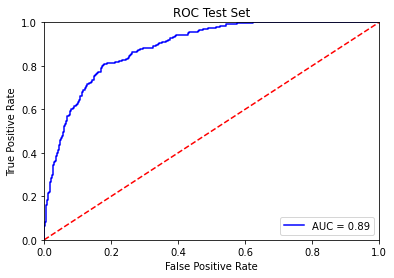

In [50]:
fpr, tpr, threshold = metrics.roc_curve(y_test, lgb_y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Test Set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 9. Conclusión

En el presente proyecto se realizó un análisis y se elaboró un modelo de clasificación para la empresa Interconnect para predecir si un cliente dejará de tener relación con la empresa.

Los datos se encontraban en cuatro tablas:
* Contract: contiene la información de los contratos.
* Personal: datos personales de los clientes.
* Internet: información sobre los servicios de internet.
* Phone: información sobre los servicios telefónicos.

Al inicio se realizó una exploración de datos y se determinó que existen varios clientes que no se encuentran en las tablas Internet y Phone. Estos casos posteriormente sería imputados (Phone) o removidos (Internet) de la tabla final para entrenamiento del modelo.

Posteriormente se realizó el tratamiento de las variables, así como la creación de algunas nuevas para apoyar la predicción del modelo. Las variables categóricas se codificaron para que pudieran ser procesadas por el modelo y se cambiaron los tipos de dato de las columnas de fecha. También se imputaron los valores faltantes en la columna EndDate.

Finalmente se elaboró el modelo de clasificación, el cual consiste en un árbol potenciado por gradiente (Gradient Boosted Tree) utilizando la librería LightGBM. Esta librería se eligió debido a su implementación de manejo de variables categóricas, las cuales son la mayoría de las variables de nuestra base.

En el resultado final se muestra un AUCROC con un valor de 0.886, el cual supera nuestro objetivo mínimo de 0.75.

Agradecemos la confianza de Interconnect y esperamos seguir contando con su confianza para la elaboración de nuevos modelos en el futuro.



# Parte 3: Informe de solución

El presente proyecto se elaboró con la finalidad de proporcionar a la empresa InterConnect con un modelo de clasificación para predecir si los clientes de la empresa dejarán de tener relaciones con esta en algún momento. A continuación se presentarán respuestas a ciertas preguntas planteadas por el líder del equipo.

* ¿Qué pasos del plan se realizaron y qué pasos se omitieron?
    1. Implementar cambios de reunión y reunificar las tablas: Se realizó la reunificación de las tablas para contar con toda la información junta para el entrenamiento del modelo.
    2. Codificar las variables categóricas para mejorar su manejo por los modelos: Se realizó una codificación ordinal para las variables categóricas y una transformación a tipo entero para las fechas para que el modelo de LightGBM pudiera consumirlas.
    3. Elegir y entrenar modelos: Se eligió el modelo de árbol potenciado por gradiente de LightGBM debido a su implementación de manejo de variables categóricas.
    4. En caso no se alcance la métrica objetivo, realizar alguna técnica de manejo de desbalance de clases como Oversampling y volver a entrenar: Debido a que se alcanzó la métrica objetivo, este paso se omitió.
    5. Documentar y entregar resultados: Confirmado.
* ¿Qué dificultades se encontraron y cómo se lograron resolver?
    1. Se encontró que la variable de TotalCharges estaba en tipo caracter y que había valores que contenían un espacio en blanco " ". Se resolvió convirtiendo los valores a númerico y los espacios en blanco tomándose como cero (estos registros posteriormente se eliminarían por pertenecer a la fecha límite de la base y no ser relevantes).
    2. Clientes faltantes en la tabla Phone. Se resolvió imputando los valores de su única columna con un "No".
    3. Valores faltantes de EndDate. Ya que esta variable contenía la métrica objetivo, se extrajeron los valores de "No" a una columna aparte. Posteriormente se realizó un cálculo de cuántos meses pudo haber tenido relación la empresa con el cliente, lo cual se colocó en la columna "months" y los valores faltantes de EndDate se imputaron con un cálculo de BeginDate + months.
    4. Ingresar las fechas al modelo de LightGBM. Debido a que LighGBM no acepta timestamps, se consideraron varias formas de ingresar las fechas. Finalmente se decidió por utilizar un formato int64 para representar las fechas.
    5. Clientes faltantes en la tabla Internet. Por ser muchos valores faltantes y muchas variables por imputar, se decidió por eliminar estos registros del entrenamiento, ya que su inclusión crearía sesgos en el modelo.
* ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?
    1. Unificar las tablas para tener toda la información en un solo lugar y procesarla fácilmente.
    2. Imputar valores faltantes y codificar variables categóricas.
    3. Dividir los datos en conjuntos de entrenamiento, validación y prueba.
    4. Elegir y entrenar el modelo.
    5. Probar el modelo con el conjunto de prueba y validar resultados.
* ¿Cuál es tu modelo final y qué nivel de calidad tiene?
    * El modelo final es un árbol potenciado por gradiente (Gradient Boosted Tree) de la librería LightGBM, el cual se eligió por poseer un buen poder predictivo y una implementación de variables categóricas, las cuales conforman la mayor parte de los datos. El valor del AUROC final es de 0.886, el cual supera el límite mínimo de 0.75 para obtener 4 StoryPoints, así como el límite de 0.88 para obtener 6 StoryPoints. El modelo también presenta un valor de exactitud de 0.82, el cual se considera satisfactorio.